#### Advanced statistics for data science (Spring 2021-2022)
# Exploratory Data Analysis 

Objective of this tutorial:
1. Develop familiarity with numerical and statistical packages in Python 
2. Experience with numerical and visual summarization of data
3. Understand the importance of EDA before embarking on sophisticated model building

**Material credit**: 
The material in this notebook was adapted from Penn State University's STAT508 online webpage (https://online.stat.psu.edu/stat508/lesson/1b)


## Overview
Exploratory Data Analysis (EDA) can also be understood as ``data-driven hypothesis generation''. EDA provides the initial pointers towards modeling and learning techniques -- we examine the data for structures that may indicate relationships among cases or variables


## 1. What is data?
- Anything that is observed or conceptualized 
- Represent facts or something that has actually taken place, observed and measured
- May come out of passive observation or active collection 
- Data point must be unambiguous and measurable; usually rooted in a physical, demographical or behavioral phenomenon


In our class:
- **Data** is a collection of objects and their attributes
- **Attribute** (feature, variable, or field) is a property or characteristic of an object
- **Collection of Attributes** -- describe an object (individual, entity, case, or record)



#### Example Dataset
We will work with the London Housing Prices Dataset from Kaggle:

In [7]:
# get data using the kaggle cli
!kaggle competitions download -c house-prices-advanced-regression-techniques
!mkdir house-prices
import zipfile
with zipfile.ZipFile('house-prices-advanced-regression-techniques.zip', 'r') as zip_ref:
    zip_ref.extractall('house-prices')

house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)


A subdirectory or file house-prices already exists.


In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [10]:
# read the data and filter some results
data = pd.read_csv("house-prices/train.csv")
data = data[(data.LotArea < 15000) & (data.MSZoning == 'RL') & (data.PavedDrive.isin(['Y', 'N']))] # we only consider small residential lots
data = data.filter(['Id', 'MSSubClass', 'LotArea', 'LotShape', 'YrSold', 'MoSold',
 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'YearBuilt',
 'PavedDrive', 'SalePrice']) # we only consider these columnes
data.head(10)

,Id,MSSubClass,LotArea,LotShape,YrSold,MoSold,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,YearBuilt,PavedDrive,SalePrice
0,1,60,8450,Reg,2008,2,2,1,3,1,2003,Y,208500
1,2,20,9600,Reg,2007,5,2,0,3,1,1976,Y,181500
2,3,60,11250,IR1,2008,9,2,1,3,1,2001,Y,223500
3,4,70,9550,IR1,2006,2,1,0,3,1,1915,Y,140000
4,5,60,14260,IR1,2008,12,2,1,4,1,2000,Y,250000
5,6,50,14115,IR1,2009,10,1,1,1,1,1993,Y,143000
6,7,20,10084,Reg,2007,8,2,0,3,1,2004,Y,307000
7,8,60,10382,IR1,2009,11,2,1,3,1,1973,Y,200000
9,10,190,7420,Reg,2008,1,1,0,2,2,1939,Y,118000
10,11,20,11200,Reg,2008,2,1,0,3,1,1965,Y,129500


#### Example:
In the table above, each Row is an *Object* and each *Column* is an *Attribute*.

- Often attributes are referred to as variables 
- Attributes contain information regarding each unit of observation
- Depending on how many different types of information are collected from each unit, the data may be univariate, bivariate or multivariate (as in the table below)

Data can have varied forms and structures but in one criterion they are all the same -- data contains information and characteristics that separate one unit or observation from the others.

### Types of Attributes
- **Nominal** -- Qualitative variables that do not have a natural order, e.g. *LotShape*, *MSSubClass*
- **Ordinal** -- Qualitative variables that have a natural order, e.g. *SalePrice*, *LotArea*, *FullBath*
- **Interval** -- Measurements where the difference between two values is meaningful, e.g. *YrSold*, *SalePrice*, *LotArea*, 
- **Ratio** -- Measurements where both difference and ratio are meaningful, e.g. *SalePrice*, *LotArea*


### Discrete and Continuous Attributes
- **Discrete Attribute** -- A variable or attribute is discrete if it can take a finite or a countably infinite set of values. A discrete variable is often represented as an integer-valued variable. Examples: *FullBath*, *HalfBath*, *MSSubClass*, *BedroomAbvGr*, *KitchenAbvGr*. A binary variable is a special case where the attribute can assume only two values. Example: *PavedDrive*

- **Continuous Attribute** -- A variable or attribute is continuous if it can take any value in a given range; possibly the range being infinite. Examples: *LotArea*, *SalePrice*, *YrSold*


In the hierarchy of data, nominal is at the lowermost rank as it carries the least information. The highest type of data is ratio since it contains the maximum possible information. While analyzing the data, it has to be noted that procedures applicable to a lower data type can be applied for a higher one, but the reverse is not true. Analysis procedure for nominal data can be applied to interval type data, but it is not recommended since such a procedure completely ignores the amount of information an interval type data carries. But the procedures developed for interval or even ratio type data cannot be applied to nominal nor to ordinal data. A prudent analyst should recognize each data type and then decide on the methods applicable.

## 2. Numerical Summarization

### Summary Statistics
The vast amount of numbers on a large number of variables need to be properly organized to extract information from them. Broadly speaking there are two methods to summarize data: visual summarization and numerical summarization. Both have their advantages and disadvantages and applied jointly they will get the maximum information from raw data.

Summary statistics are numbers computed from the sample that present a summary of the attributes.

#### Measures of Location
- Single numbers representing a set of observations
- Include measures of central tendency; can also be taken as the most representative values of the set of observations
- Most common measures of location: *Mean*, the *Median*, the *Mode*, and the *Quartiles*
 - **Mean** is the arithmetic average of all the observations, i.e., the sum of all observations divided by the sample size
 - **Median** is the middle-most value of the ranked set of observations so that half the observations are greater than the median and the other half is less. The Median is considered a robust measure of central tendency
 - **Mode** is the most frequently occurring value in the data set. Particularly useful when attributes are not continuous
 - **Quartiles** are division points which split data into four equal parts after rank-ordering them. Division points are called **Q1** (the first quartile), **Q2** (the second quartile or median), and **Q3** (the third quartile)
> Note! Quartiles are not necessarily four equidistance point on the range of the sample
Similarly, Deciles and Percentiles are defined as division points that divide the rank-ordered data into 10 and 100 equal segments. 


In [16]:
def q1(x):
    """
    Compute the 25-th (1st quartile) percentile of the vector x
    """
    if x.dtypes.kind == 'O':
        return np.nan
    else:
        return pd.Series.quantile(x, .25)

def q3(x):
    """
    Compute the 75-th (3rd quartile) percentile of the vector x
    """
    if x.dtypes.kind == 'O':
        return np.nan
    else:
        return pd.Series.quantile(x, .75)


# 'MSSubClass' is not ordinal although its type indicate it is
data['MSSubClass'] = pd.Categorical(data['MSSubClass']) # make categorical
data.agg(['mean', q1, 'median', q3])

,Id,MSSubClass,LotArea,LotShape,YrSold,MoSold,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,YearBuilt,PavedDrive,SalePrice
mean,734.171569,NaN,9739.907843,NaN,2007.857843,6.345098,1.583333,0.393137,2.910784,1.038235,1976.265686,NaN,185834.145098
q1,372.500000,NaN,8250.000000,NaN,2007.000000,5.000000,1.000000,0.000000,3.000000,1.000000,1959.000000,NaN,136800.000000
median,746.500000,NaN,9673.500000,NaN,2008.000000,6.000000,2.000000,0.000000,3.000000,1.000000,1977.000000,NaN,170000.000000
q3,1094.250000,NaN,11363.250000,NaN,2009.000000,8.000000,2.000000,1.000000,3.000000,1.000000,2001.000000,NaN,216877.750000


Non-numeric calues are not aggregated

#### Measures of Spread/Dispersion
- Measures of location are not enough to capture all aspects of the attributes
- Measures of dispersion are necessary to understand the variability of the data
- The most common measure of dispersion is the *Variance*, the *Standard Deviation*, the *Interquartile Range* and *Range*.

- **Variance** measures how far data values lie from the mean. It is defined as the average of the squared differences between the mean and the individual data values
- **Standard Deviation**
is the square root of the variance. It is defined as the average distance between the mean and the individual data values
- **Interquartile range (IQR)** is the difference between Q3 and Q1. IQR contains the middle 50% of data
- **Range** is the difference between the maximum and minimum values in the sample

In [17]:
def iqr(x):
    return x.quantile(.75) - x.quantile(.25)

def rng(x):
    return x.max() - x.min()

data_numeric = data.filter(['LotArea', 'YearBuilt', 'YrSold', 'MoSold',
 'FullBath', 'HalfBath', 'BedroomAbvGr',
 'KitchenAbvGr', 'SalePrice'])

data_numeric.agg(['var', 'std', rng, iqr])

,LotArea,YearBuilt,YrSold,MoSold,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,SalePrice
var,6.030396e+06,666.112855,1.753079,7.295903,0.290399,0.260404,0.570050,0.038772,5.318739e+09
std,2.455687e+03,25.809162,1.324039,2.701093,0.538887,0.510298,0.755017,0.196906,7.292969e+04
rng,1.270900e+04,135.000000,4.000000,11.000000,3.000000,2.000000,6.000000,2.000000,5.723570e+05
iqr,3.113250e+03,42.000000,2.000000,3.000000,1.000000,1.000000,0.000000,0.000000,8.007775e+04


Note:
 - $\sqrt{var(x)} = std(x)$ 
 - $iqr(x) <= rng(x)$
 - IQR is sometimes used as a robust estimator of the standard deviation

### Measures of Skewness

In addition to the measures of location and dispersion, the arrangement of data or the shape of the data distribution is also of considerable interest. The most 'well-behaved' distribution of values is a symmetric distribution where the mean and the median are coincident. The symmetry is lost if there exists a tail in either direction. Skewness measures whether or not a distribution of values has a single long tail.

Skewness of $x_1,\ldots,x_n$ is measured as:
$$
g_1 \equiv \dfrac{\sqrt{n} \left( \sum_{i=1}^n \left(x_{i} - \bar{x} \right)^{3} \right)}{\left(\sum_{i=1}^n \left(x_{i} - \bar{x} \right)^{2}\right)^{\frac{3}{2}}},\qquad \bar{x} \equiv \frac{1}{n} \sum_{i=1}^n x_i
$$


In [18]:
data.skew()

Id             -0.051552
LotArea        -0.293997
YrSold          0.066835
MoSold          0.195747
FullBath       -0.108823
HalfBath        0.681229
BedroomAbvGr    0.094115
KitchenAbvGr    4.431970
YearBuilt      -0.651362
SalePrice       1.472916
dtype: float64

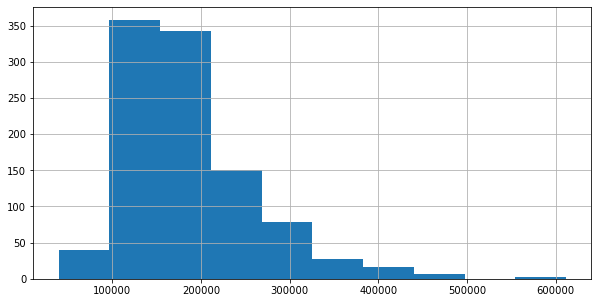

In [19]:
plt.rcParams['figure.figsize'] = [10, 5]
# Positive skewness indicate right-tailed distribution of values:
from matplotlib import pyplot as plt
data['SalePrice'].hist()
plt.show()

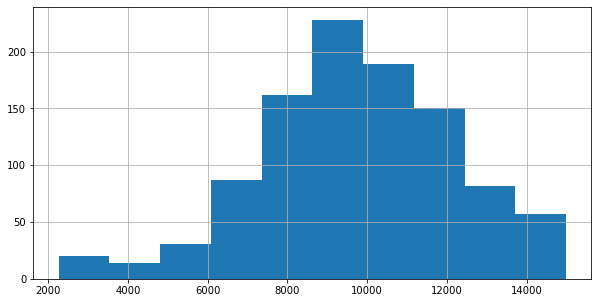

In [20]:
# Negative skewness indicate left-tailed distribution of values:
data['LotArea'].hist()
plt.show()

### Measures of Correlation

All the above summary statistics are applicable only for univariate data where information on a single attribute is of interest. Correlation describes the degree of the linear relationship between two attributes, $X_1$ and $X_2$.

With $X_1$ taking the values $x_{1,1},\ldots,x_{1,n}$ and $X_2$ taking the values $x_{2,1},\ldots,x_{2,n}$ the **sample correlation coefficient** is defined as:
$$
\rho (X_1,X_2)= \dfrac{\sum_{i=1}^{n}\left ( x_{1,i}-\bar{x}_1 \right )\left ( x_{2,i}-\bar{x}_2 \right )}{\sqrt{\sum_{i=1}^{n}\left ( x_{1,i}-\bar{x}_1 \right )^2 \sum_{i=1}^{n}\left ( x_{2,i}-\bar{x}_2 \right )^2}}
$$

The correlation coefficient is always between $-1$ (perfect negative linear relationship) and $+1$ (perfect positive linear relationship). 

In [21]:
data.corr()

,Id,LotArea,YrSold,MoSold,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,YearBuilt,SalePrice
Id,1.000000,-0.022108,0.001796,0.048747,-0.000659,0.001345,0.011974,0.009896,-0.047991,-0.038535
LotArea,-0.022108,1.000000,-0.032688,-0.011462,0.154029,0.158235,0.282569,-0.011076,0.106445,0.384096
YrSold,0.001796,-0.032688,1.000000,-0.173411,-0.001948,0.004364,-0.008773,0.028397,-0.011788,-0.016930
MoSold,0.048747,-0.011462,-0.173411,1.000000,0.065173,0.005422,0.036766,0.006534,0.049713,0.075281
FullBath,-0.000659,0.154029,-0.001948,0.065173,1.000000,0.125200,0.325817,0.094796,0.530530,0.556140
HalfBath,0.001345,0.158235,0.004364,0.005422,0.125200,1.000000,0.266873,-0.032546,0.198908,0.279494
BedroomAbvGr,0.011974,0.282569,-0.008773,0.036766,0.325817,0.266873,1.000000,0.168189,-0.019430,0.130423
KitchenAbvGr,0.009896,-0.011076,0.028397,0.006534,0.094796,-0.032546,0.168189,1.000000,-0.134470,-0.152900
YearBuilt,-0.047991,0.106445,-0.011788,0.049713,0.530530,0.198908,-0.019430,-0.134470,1.000000,0.587086
SalePrice,-0.038535,0.384096,-0.016930,0.075281,0.556140,0.279494,0.130423,-0.152900,0.587086,1.000000


## 3. Visualization
The objective of visualization is to reveal the hidden information through simple charts and diagrams. Visual representation of data is the first step towards data exploration and formulation of an analytical relationship among the variables. In a whirl of complex and voluminous data, visualization in one, two and three dimension help data analysts to sift through data in a logical manner and understand the data dynamics. It is instrumental in identifying patterns and relationships among groups of variables. Visualization techniques depend on the type of variables. Techniques available to represent nominal variables are generally not suitable for visualizing continuous variables and vice versa. Data often contains complex information. It is easy to internalize complex information through visual mode. Graphs, charts and other visual representation provide quick and focused summarization.


### Tools for Displaying Single Variables

#### Histogram
Histograms are the most common grapical tool to represent continuous data. On the horizontal axis, the range of the sample is plotted. On the vertical axis is plotted the frequencies or relative frequencies of each class. The class width has an impact on the shape of the histogram. The histograms in the previous section were drawn from a random sample generated from theoretical distributions. Here we consider a real example to construct histograms. 


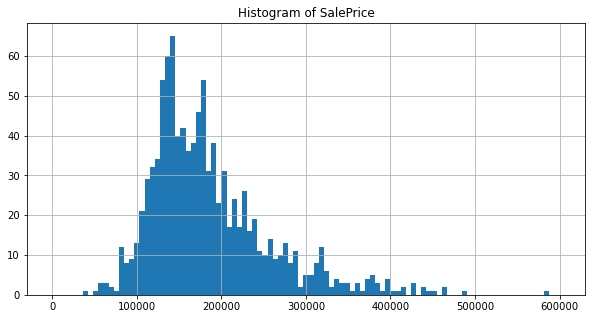

In [22]:
plt.rcParams['figure.figsize'] = [10, 5]
data.SalePrice.hist(bins=np.linspace(0, 600000, 100))
plt.title("Histogram of SalePrice")
plt.show()

The data set contains a number of categorical variables one of which is PavedDrive. A natural question is whether the distribution of the sale price values is the same across lot shapes. We can explore this question qualitatively by plotting a seperate histogram for each value of PavedDrive.

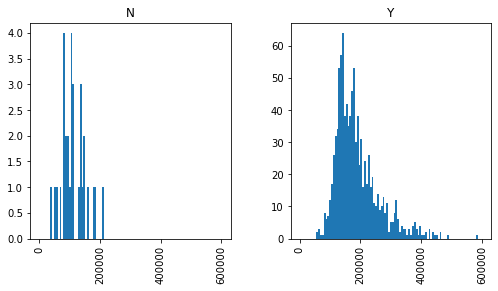

In [23]:
plt.rcParams['figure.figsize'] = [8, 4]
data.SalePrice.hist(by = data['PavedDrive'], bins=np.linspace(0, 600000, 100), )
plt.show()

The data tells us that house without a paved driveway tends to be cheaper

### Boxplot
Boxplot is used to describe the shape of a data distribution and especially to identify outliers. Typically an observation is an outlier if it is either less than $Q1 - 1.5$ IQR or greater than $Q3 + 1.5$ IQR, where IQR is the inter-quartile range defined as $Q3 - Q1$. This rule is conservative and often too many points are identified as outliers. Hence sometimes only those points outside of $[Q1 - 3, Q3+3] \times IQR$ are only identified as outliers. 

Note that many times outliers can deliver more information than the data itself, so remove those with caution and ideally after a disucssion on their origin. 

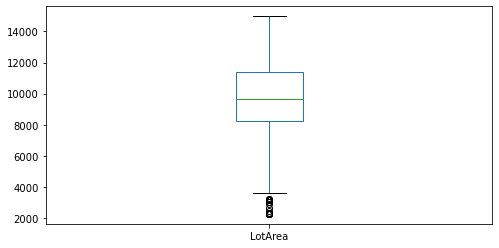

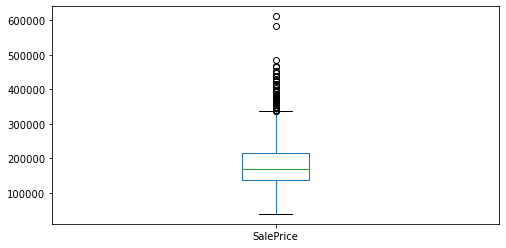

In [24]:
data.filter(['LotArea']).plot.box()
data.filter(['SalePrice']).plot.box()
plt.show()

### Tools for Displaying Relationships Between Variables

### Scatterplot
The most standard way to visualize relationships between two variables is a scatterplot. It shows the direction and strength of association between two variables but does not quantify. Scatterplots also help to identify unusual observations. In the previous section (Section 1(b).2) a set of scatterplots are drawn for different values of the correlation coefficient. The data there is generated from a theoretical distribution of multivariate normal distribution with various values of the correlation parameter. Below is the R code used to obtain a scatterplot for these data:

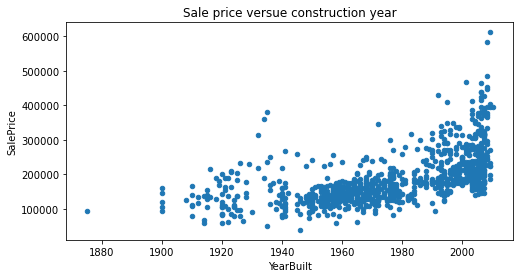

In [25]:
data.plot.scatter(x='YearBuilt', y='SalePrice')
plt.title("Sale price versue construction year")
plt.show()

It appears from the scatterplot that newer houses tend to have higher sales price. This information can helps us to develop a model for pridicing house prices.

#### Contour plot
This is useful when a continuous attribute is measured on a spatial grid. They partition the plane into regions of similar values. The contour lines that form the boundaries of these regions connect points with equal values. In spatial statistics, contour plots have a lot of applications.

Contour plots join points of equal probability. Within the contour lines concentration of bivariate distribution is the same. One may think of the contour lines as slices of a bivariate density, sliced horizontally. Contour plots are concentric; if they are perfect circles then the random variables are independent. The more oval shaped they are, the farther they are from independence. 

#### Correlation Matrix
When we wish to explore the correlation among many attributes, it is useful to display a heatmap of the correlation matrix: a matrix in which the $i,j$-th cell indicates $\rho(x_i,x_j)$

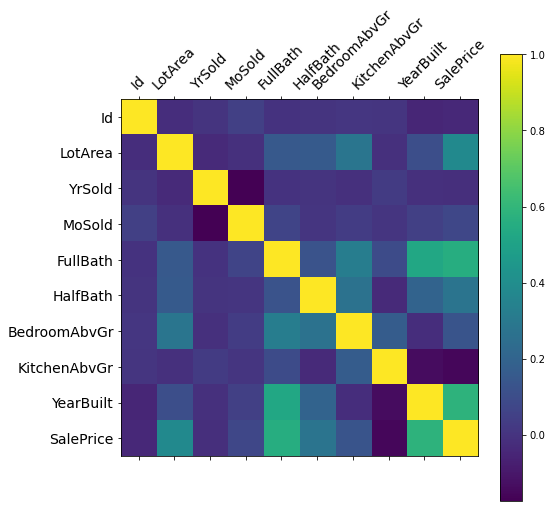

In [26]:
f = plt.figure(figsize=(8, 8))

plt.matshow(data.corr(), fignum=f.number)
numeric_cols = data.select_dtypes(['number'])
plt.xticks(range(numeric_cols.shape[1]),
 numeric_cols.columns, fontsize=14, rotation=45)
plt.yticks(range(numeric_cols.shape[1]),
 numeric_cols.columns, fontsize=14)
cb = plt.colorbar()
#cb.ax.tick_params(labelsize=10)
#plt.title('Correlation Matrix', fontsize=16);

#### Pairs Plot/Scatterplot Matrix
Displaying more than two variables on a single scatterplot is not possible. Scatterplot matrix is one possible visualization of three or more continuous variables taken two at a time.

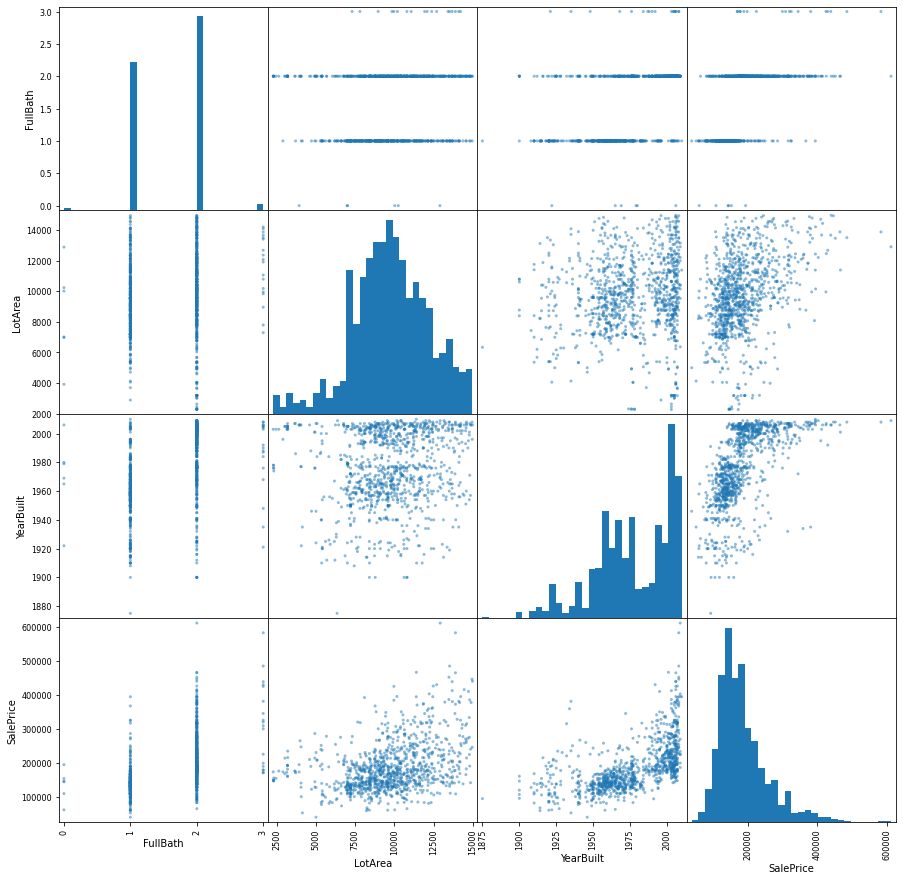

In [27]:
plt.rcParams['figure.figsize'] = [15, 15]
pd.plotting.scatter_matrix(
 data.filter(['FullBath', 'LotArea', 'YearBuilt', 'SalePrice']),
 hist_kwds={'bins':30})

plt.show()

### Tidy Data (https://r4ds.had.co.nz/tidy-data.html)

According to Hadley Wickham, A dataset is considered *tidy* if it is arranged such that each variable is a column and each observation (or case) is a row. Specifcially:
> There are three interrelated rules which make a dataset tidy:
> 1. Each variable must have its own column.
> 2. Each observation must have its own row.
> 3. Each value must have its own cell.

Hadley Wickham wrote several popular R packages for manipulating, analyzing and plotting data centered around the tidy data concept. Most of the functinality in these packages is avaialble today in python (but not all).

In particular:
- *Pandas* is the standard package for manipulating tabular data
- *plotnine* (https://plotnine.readthedocs.io/en/stable/) is a relatively successful python adaptation of the popular R package *ggplot*(https://ggplot2.tidyverse.org/). Plotnine mimics ggplot's API and preserves the 'grammer of graphics' conept. Below are several examples. 

In [29]:
!pip install plotnine

In [30]:
from plotnine import *

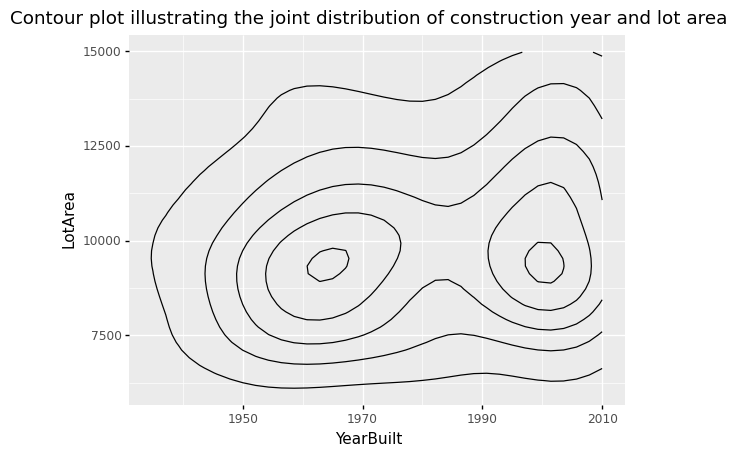

In [31]:
p = (ggplot(aes(x='YearBuilt', y = 'LotArea'), data=data) + stat_density_2d()
 + ggtitle("Contour plot illustrating the joint distribution of construction year and lot area")
 )
print(p)


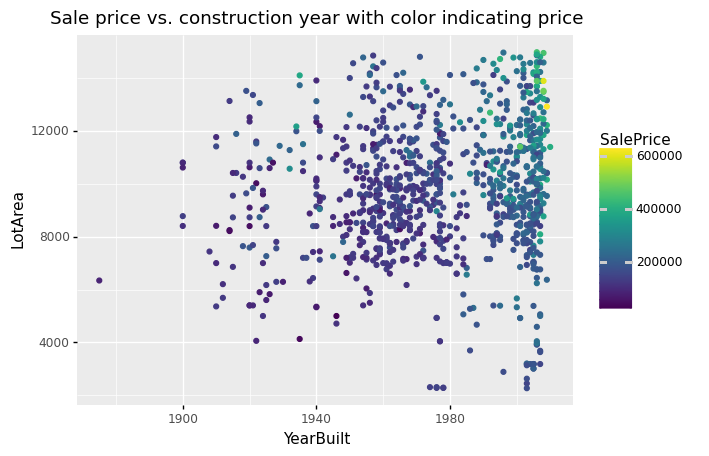

In [32]:
p = (ggplot(aes(x='YearBuilt', y = 'LotArea', color='SalePrice'), data=data) + geom_point()
 + ggtitle("Sale price vs. construction year with color indicating price")
 )
print(p)

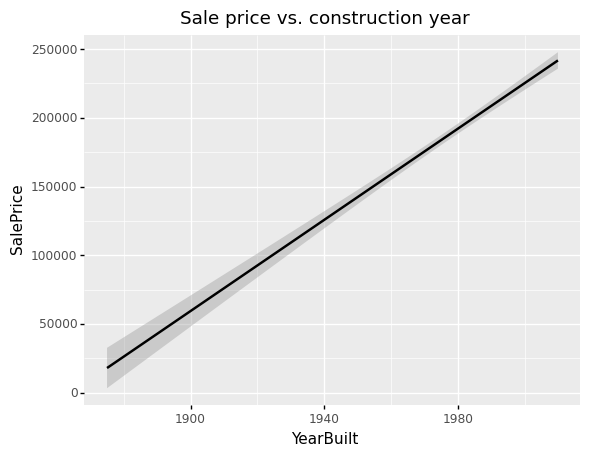

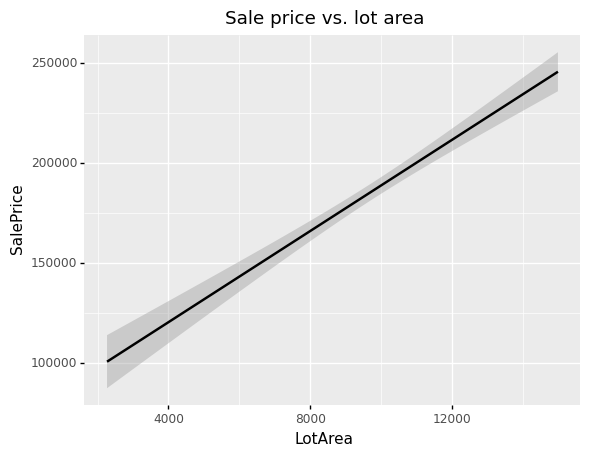

In [33]:
p = (ggplot(aes(x='YearBuilt', y='SalePrice'), data=data) + geom_smooth(method='lm') ) + ggtitle("Sale price vs. construction year")
print(p)

p = (ggplot(aes(x='LotArea', y='SalePrice'), data=data) + geom_smooth(method='lm') ) + ggtitle("Sale price vs. lot area")
print(p)


The figures above represents univariate linear model fits to *SalePrice* with on predictor *LotArea* or *YearBuilt*, respectively. These figures suggest that *YearBuilt* and *LotArea* are good predictors of the sales price. However, the standard error represented by gray area indicates that *YearBuilt* is a better predictor than *LotArea* because the lower standard error across all range. Later on in the class, we will defines quantitave way to make assertions regarding the performance of competing models. We will also explore multivariate linear models incorporating both predictors. 